In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

In [2]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [3]:
y_data=df['price']

In [4]:
x_data=df.drop('price',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print('The number of test samples :',x_test.shape[0]);
print('The number of training samples:',x_train.shape[0]);

The number of test samples : 21
The number of training samples: 180


In [7]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.40,random_state=0)
print('The number of test samples :',x_test1.shape[0]);
print('The number of training samples:',x_train1.shape[0]);

The number of test samples : 81
The number of training samples: 120


In [8]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [9]:
lm.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [10]:
lm.score(x_train[['horsepower']],y_train)

0.6619724197515103

In [11]:
lm.score(x_test1[['horsepower']],y_test1)

0.7565592251392638

In [12]:
lm.score(x_train1[['horsepower']],y_train1)

0.5589207284321129

In [13]:
from sklearn.model_selection import cross_val_score
Rcross=cross_val_score(lm,x_data[['horsepower']],y_data,cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [35]:
print("The mean of the folds are",Rcross.mean(),"and the standard deviation is", Rcross.std()) 

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [36]:
Rc=cross_val_score(lm,x_data[['horsepower']],y_data,cv=2)
Rc

array([0.59015621, 0.44319613])

In [37]:
Rc.mean()

np.float64(0.5166761697127429)

In [38]:
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lm,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [42]:
lr1=LinearRegression()
lr1.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)
yhat_train=lr1.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]


array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [41]:
yhat_test=lr1.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_15644\559975359.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_train,color="r",hist=False,label="Actual Value")
C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_15644\559975359.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

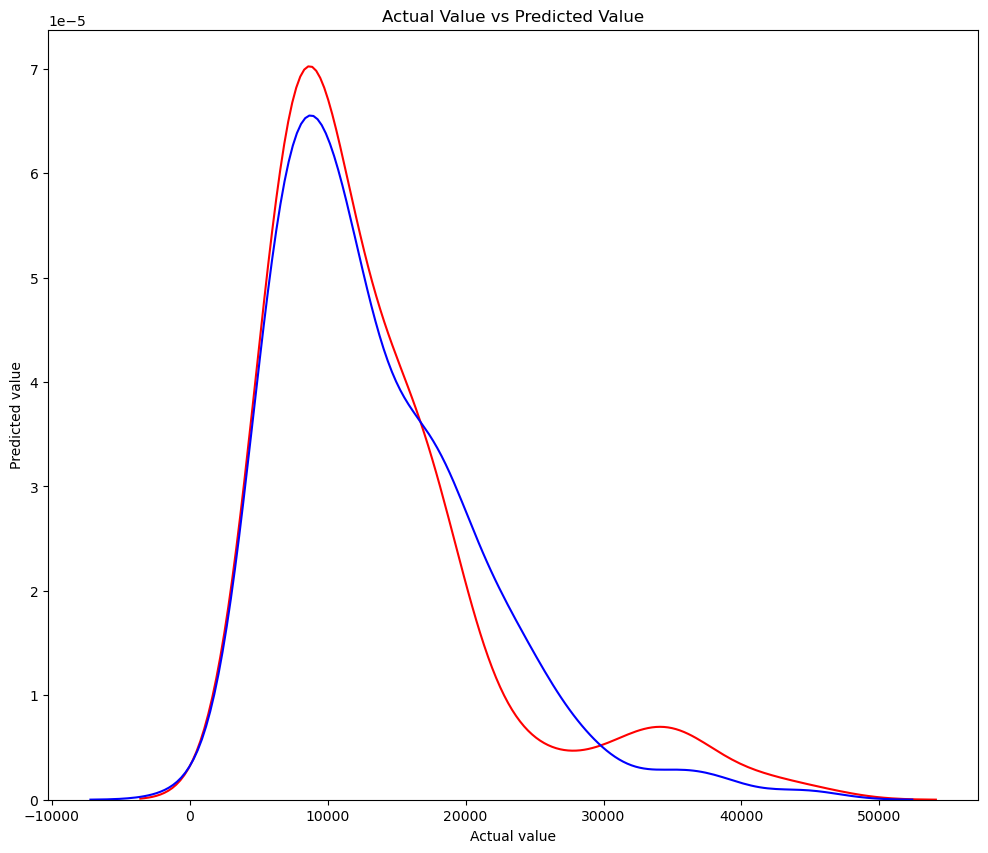

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
width=12
height=10
plt.figure(figsize=(width,height))
ax1=sns.distplot(y_train,color="r",hist=False,label="Actual Value")
sns.distplot(yhat_train,color="b",hist=False,label="Predicted value")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title('Actual Value vs Predicted Value');

C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_15644\1593577616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,color="r",hist=False,label="Actual Value")
C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_15644\1593577616.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

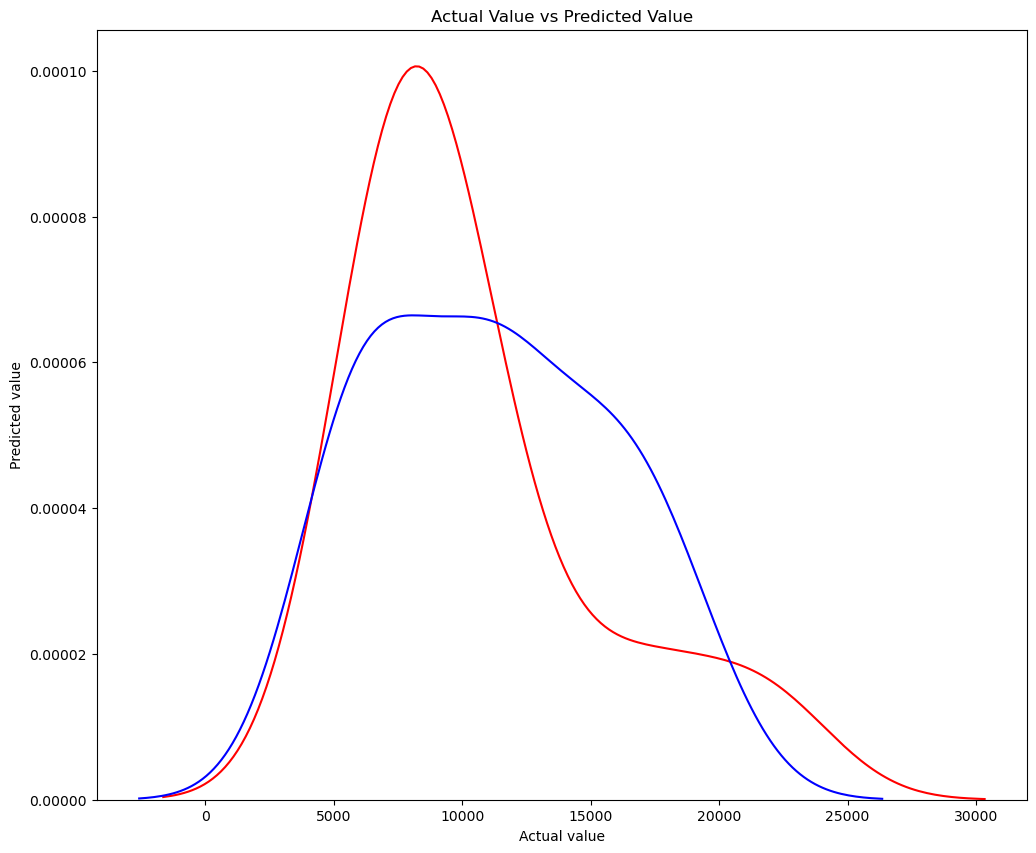

In [46]:
width=12
height=10
plt.figure(figsize=(width,height))
ax1=sns.distplot(y_test,color="r",hist=False,label="Actual Value")
sns.distplot(yhat_test,color="b",hist=False,label="Predicted value")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title('Actual Value vs Predicted Value');

In [49]:
from sklearn.preprocessing import PolynomialFeatures
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.55,random_state=0)
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr


PolynomialFeatures(degree=5)

In [50]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [51]:
Yhat=poly.predict(x_test_pr)
Yhat[0:5]

array([ 6441.51161086,  7052.77322353, 12145.70565365, 18349.07877624,
       19587.97655687])

In [52]:
print("Predicted values:",Yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [ 6441.51161086  7052.77322353 12145.70565365 18349.07877624]
True values: [ 6295. 10698. 13860. 13499.]


In [53]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [54]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

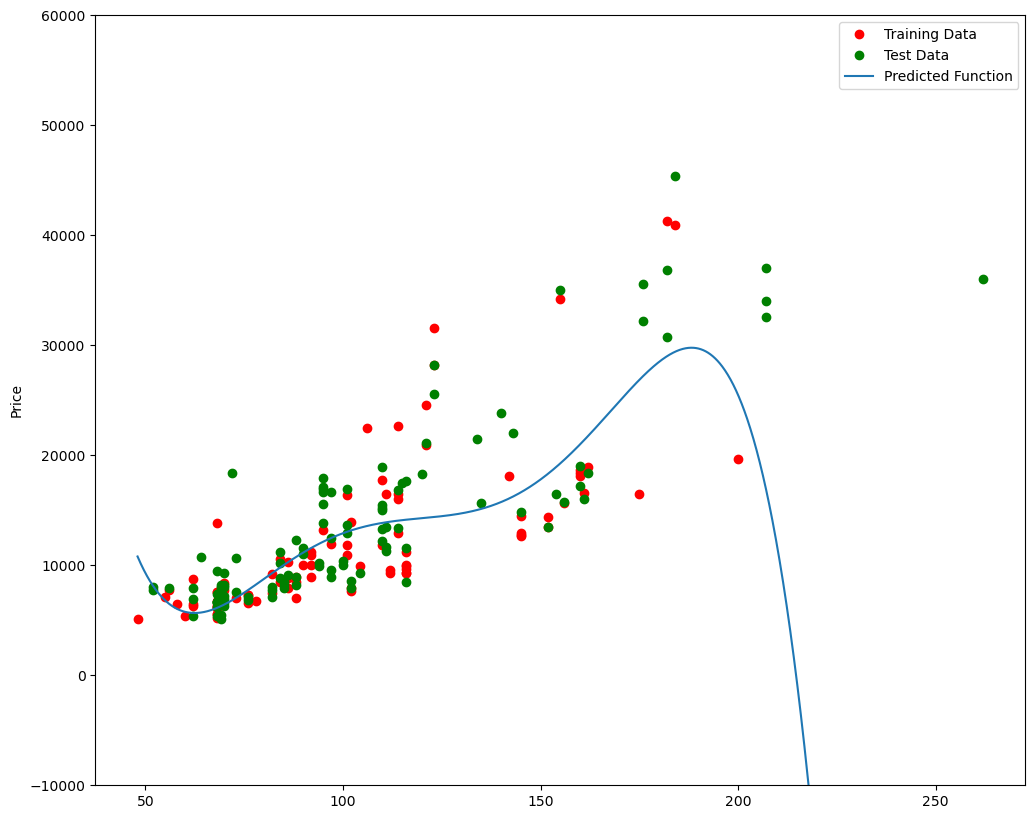

In [55]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [56]:
poly.score(x_train_pr,y_train)

0.5682646622845308

In [57]:
poly.score(x_test_pr,y_test)

-38.23520815276417

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

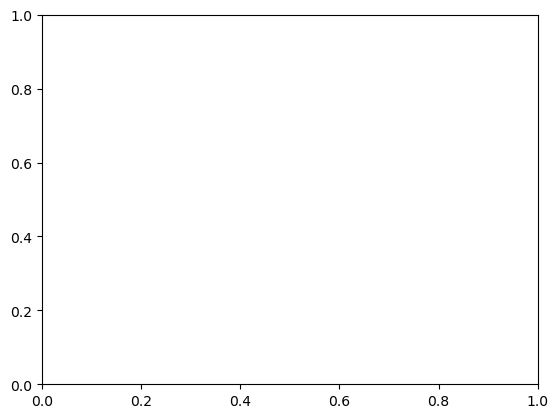

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
lr=LinearRegression()
Rsqu_test=[]
order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

    plt.plot(order,Rsqu_test)
    plt.xlabel('order')
    plt.ylabel('F^2')
    plt.title('R^2 Using Test Data')
    plt.text(3,0.75,'Maximum R^2')


In [19]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [22]:
x_train_pr1.shape

(180, 15)

In [24]:
lr1=LinearRegression()
lr1.fit(x_train_pr1,y_train)
lr1.fit(x_test_pr1,y_test)

LinearRegression()

In [26]:
Yhat_train1=lr1.predict(x_train_pr1)
Yhat_test1=lr1.predict(x_test_pr1)

C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_14260\1721602482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_train,hist=False,color="r",label="Actual Value")
C:\Users\Prasanth M\AppData\Local\Temp\ipykernel_14260\1721602482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

<Axes: xlabel='price', ylabel='Density'>

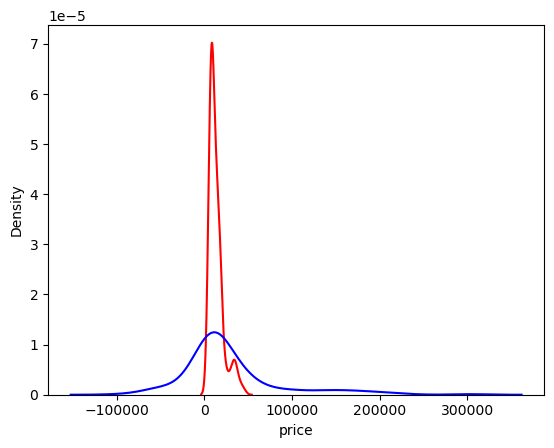

In [28]:
ax1=sns.distplot(y_train,hist=False,color="r",label="Actual Value")
sns.distplot(Yhat_train1,hist=False,color="b",label="Predicted value",ax=ax1)

In [29]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

ModuleNotFoundError: No module named 'tqdm'

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

NameError: name 'Alpha' is not defined

<Figure size 1200x1000 with 0 Axes>

In [32]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=10)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

0.3635919419232223

In [33]:
from sklearn.model_selection import GridSearchCV
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [36]:
RR=Ridge()
Grid1=GridSearchCV(RR,parameters1,cv=4)
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [38]:
BestRR.score(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

0.8087220102629342